In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#import DF

df_list = pd.read_csv(r"C:\Users\18179\Documents\CareerFoundry\Independent Project\02 Data\Raw Data\Listings.csv\Listings.csv", index_col = False)

C:\Users\18179\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Clean Data

In [7]:
#Clean extreme values

df_list = df_list[df_list['price'] < 1000]

In [8]:
#create country column

df_list.loc[df_list['city'] == 'Paris', 'country'] = 'France'
df_list.loc[df_list['city'] == 'New York', 'country'] = 'United States of America'
df_list.loc[df_list['city'] == 'Sydney', 'country'] = 'Australia'
df_list.loc[df_list['city'] == 'Rome', 'country'] = 'Italy'
df_list.loc[df_list['city'] == 'Rio de Janeiro', 'country'] = 'Brazil'
df_list.loc[df_list['city'] == 'Istanbul', 'country'] = 'Turkey'
df_list.loc[df_list['city'] == 'Mexico City', 'country'] = 'Mexico'
df_list.loc[df_list['city'] == 'Bangkok', 'country'] = 'Thailand'
df_list.loc[df_list['city'] == 'Cape Town', 'country'] = 'South Africa'
df_list.loc[df_list['city'] == 'Hong Kong', 'country'] = 'China'

In [9]:
#Select necessary columns

columns = ['price',
           'host_total_listings_count',
           'review_scores_rating',
           'review_scores_accuracy',
           'review_scores_cleanliness',
           'review_scores_checkin',
           'review_scores_location',
           'review_scores_value',
           'city',
           'country'
          ]

In [10]:
#create subset

City_rev = df_list[columns]

In [11]:
df_list['country'].value_counts()

France                      64454
United States of America    36735
Australia                   32722
Italy                       27510
Brazil                      23072
Turkey                      22891
Mexico                      13946
South Africa                 8798
Thailand                     8611
China                        6027
Name: country, dtype: int64

In [12]:
City_rev.isnull().sum()

price                            0
host_total_listings_count      140
review_scores_rating         76027
review_scores_accuracy       76285
review_scores_cleanliness    76240
review_scores_checkin        76335
review_scores_location       76338
review_scores_value          76346
city                             0
country                          0
dtype: int64

In [13]:
#impute missing values

City_rev['host_total_listings_count'].fillna(City_rev['host_total_listings_count'].median(), inplace = True)
City_rev['review_scores_rating'].fillna(City_rev['review_scores_rating'].median(), inplace = True)
City_rev['review_scores_accuracy'].fillna(City_rev['review_scores_accuracy'].median(), inplace = True)
City_rev['review_scores_cleanliness'].fillna(City_rev['review_scores_cleanliness'].median(), inplace = True)
City_rev['review_scores_checkin'].fillna(City_rev['review_scores_checkin'].median(), inplace = True)
City_rev['review_scores_location'].fillna(City_rev['review_scores_location'].median(), inplace = True)
City_rev['review_scores_value'].fillna(City_rev['review_scores_value'].median(), inplace = True)

C:\Users\18179\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [14]:
City_rev.isnull().sum()

price                        0
host_total_listings_count    0
review_scores_rating         0
review_scores_accuracy       0
review_scores_cleanliness    0
review_scores_checkin        0
review_scores_location       0
review_scores_value          0
city                         0
country                      0
dtype: int64

<AxesSubplot:xlabel='review_scores_value', ylabel='Count'>

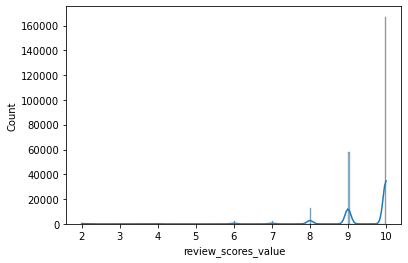

In [15]:
#Check rating

sns.histplot(City_rev['review_scores_value'], bins=200, kde = True)

In [16]:
# Check the mean for review value
City_rev['review_scores_value'].mean() 

9.537354044270854

In [17]:
#check median review value
City_rev['review_scores_value'].median()

10.0

In [18]:
#check mean price
City_rev['price'].mean()

221.1122337252723

In [19]:
#check median price
City_rev['price'].median()

121.0

In [20]:
#check max price
City_rev['price'].max()

999

Data Prep for regression analysis


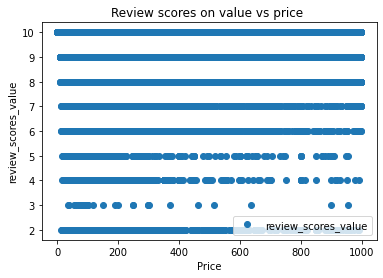

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

City_rev.plot(x = 'price', y='review_scores_value',style='o')
plt.title('Review scores on value vs price ')  
plt.xlabel('Price')  
plt.ylabel('review_scores_value')  
plt.show()

Hypothesis: Airbnb rentals with a higher price will receive higher review scores for value than lower priced rentals.

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = City_rev['price'].values.reshape(-1,1)
y = City_rev['review_scores_value'].values.reshape(-1,1)

In [23]:
X

array([[ 53],
       [120],
       [ 89],
       ...,
       [ 50],
       [105],
       [ 70]], dtype=int64)

In [24]:
y

array([[10.],
       [10.],
       [10.],
       ...,
       [10.],
       [10.],
       [10.]])

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Regression Analysis

In [26]:
# Create a regression object.

regression = LinearRegression()

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

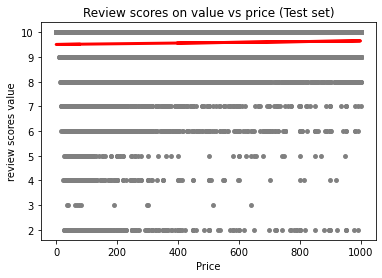

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Review scores on value vs price (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('review scores value')
plot_test.show()

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00014426]]
Mean squared error:  0.8501271945204827
R2 score:  0.0014108178768833524


In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,9.0,9.516240
1,10.0,9.512633
2,7.0,9.517682
3,10.0,9.640735
4,10.0,9.511912
5,10.0,9.530666
6,10.0,9.516961
7,10.0,9.586205
8,10.0,9.511191
9,10.0,9.548698


Compare how regression fits the training set

In [33]:
# Predict. This is predicting X_train

y_predicted_train = regression.predict(X_train) 

In [34]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00014426]]
Mean squared error:  0.8406397386738809
R2 score:  0.0012418427516110997


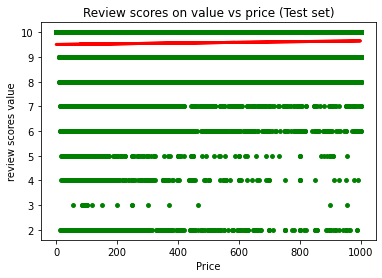

In [36]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Review scores on value vs price (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('review scores value')
plot_test.show()

Reflections

Comparing review of value scores based on price using regression analysis reveals that they have a positive correlation, but only slightly. The RMSE error of 0.84 means that the predicted review value score is off by less than a point. The R2 value of 0.001 shows that this model is not a good predictor of review value scores. This is due to the fact that there are lots of good reviews for inexpensive rentals. 

New Regression analysis

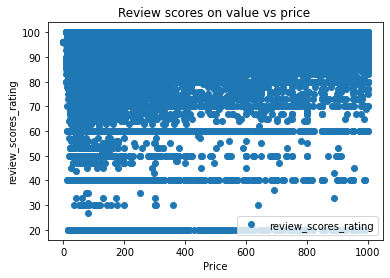

In [37]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

City_rev.plot(x = 'price', y='review_scores_rating',style='o')
plt.title('Review scores on value vs price ')  
plt.xlabel('Price')  
plt.ylabel('review_scores_rating')  
plt.show()

Hypothesis: Higher priced Airbnb rentals will receive higher overall scores from consumers.

In [45]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X1 = City_rev['price'].values.reshape(-1,1)
y1 = City_rev['review_scores_rating'].values.reshape(-1,1)

In [46]:
X1

array([[ 53],
       [120],
       [ 89],
       ...,
       [ 50],
       [105],
       [ 70]], dtype=int64)

In [47]:
# Split data into a training set and a test set.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

Regression Analysis two

In [48]:
# Create a regression object.

regression1 = LinearRegression()

In [49]:
# Fit the regression object onto the training set.

regression.fit(X1_train, y1_train)

LinearRegression()

In [50]:
# Predict the values of y using X.

y1_predicted = regression.predict(X1_test)

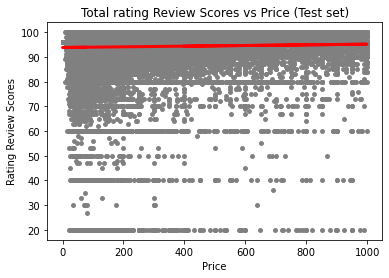

In [52]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X1_test, y1_test, color='gray', s = 15)
plot_test.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test.title('Total rating Review Scores vs Price (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Rating Review Scores')
plot_test.show()

In [53]:
# Create objects that contain the model summary statistics.

rmse1 = mean_squared_error(y1_test, y1_predicted) # This is the mean squared error
r2_1 = r2_score(y1_test, y1_predicted) # This is the R2 score. 

In [54]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse1)
print('R2 score: ', r2_1)

Slope: [[0.00133524]]
Mean squared error:  72.92442735726893
R2 score:  0.0013688097068068616


In [56]:
# Create a dataframe comparing the actual and predicted values of y.

data1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data1.head(30)

,Actual,Predicted
0,97.0,93.932690
1,96.0,93.899309
2,80.0,93.946042
3,100.0,95.085002
4,97.0,93.892633
5,97.0,94.066214
6,97.0,93.939366
7,96.0,94.580281
8,96.0,93.885957
9,96.0,94.233119


Fitting regression to training set

In [57]:
# Predict. This is predicting X_train

y1_predicted_train = regression.predict(X1_train) 

In [60]:
rmse1 = mean_squared_error(y1_train, y1_predicted_train)
r2 = r2_score(y1_train, y1_predicted_train)

In [61]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse1)
print('R2 score: ', r2)

Slope: [[0.00133524]]
Mean squared error:  71.17497892893675
R2 score:  0.0012565353289654135


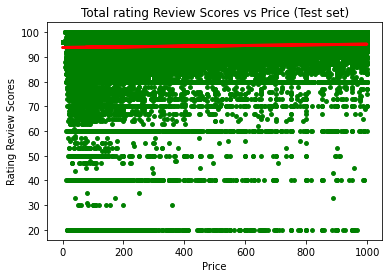

In [62]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X1_train, y1_train, color='green', s = 15)
plot_test.plot(X1_train, y1_predicted_train, color='red', linewidth =3)
plot_test.title('Total rating Review Scores vs Price (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Rating Review Scores')
plot_test.show()

Reflections

Regression analysis of the cumulative review score with price reveal similar findings to the previous analysis. The slope is basically flat. The RMSE is high with a score of 71.2. Looking at the predicted values of 'y' it is evident that the model consistently picks values in the 90s. A R2 score of 0.001 means that this model is not advanced enough to predict review scores based on price or there are better factors to base our predictions.